In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('bank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5000, 14)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [23]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df = pd.DataFrame(scale.fit_transform(df), columns=df.columns)

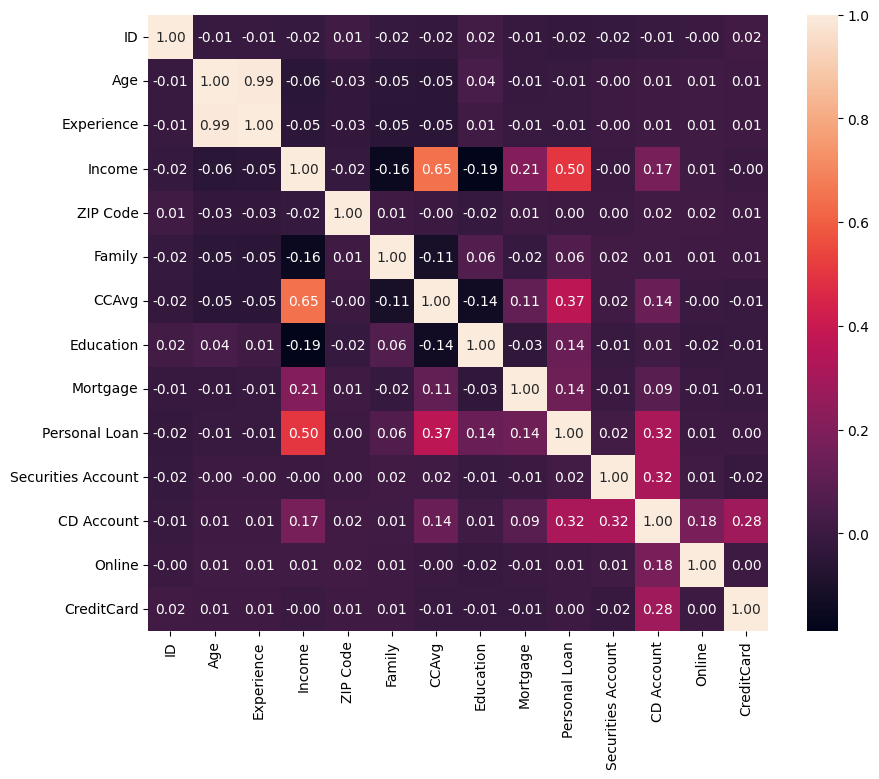

In [24]:
heat= df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(heat , annot=True, fmt='.2f')
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

In [26]:
x=df.drop('Personal Loan', axis='columns')
y=df['Personal Loan'] 

In [27]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42) 

In [28]:
test = pd.read_csv('test.csv')
test

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0


logistic

In [29]:
model = LogisticRegression()
model.fit(x_train , y_train)

LogisticRegression()

In [30]:
#score on train data
score = model.score(x_train,y_train)
score

0.9517142857142857

In [31]:
# score on test data
score = model.score(x_test,y_test)
score

0.948

In [32]:
y_pred=model.predict(test)

In [33]:
c = confusion_matrix(y_test,y_pred)
sns.heatmap(c , annot=True, fmt='.2f')

ValueError: Found input variables with inconsistent numbers of samples: [1500, 1]

In [ ]:
#decision tree

In [ ]:
decision=DecisionTreeClassifier()
decision.fit(x_train , y_train)

DecisionTreeClassifier()

In [ ]:
dt = decision.score(x_train,y_train)

In [ ]:
dt

1.0

In [ ]:
dt = decision.score(x_test,y_test)
dt

0.9813333333333333

In [ ]:
decision.predict(test)

array([1.])

In [ ]:
forest=RandomForestClassifier()
forest.fit(x_train ,y_train)

RandomForestClassifier()

In [ ]:
rf = forest.score(x_train,y_train)
rf

1.0

In [ ]:
rf = forest.score(x_test,y_test)
rf

0.9873333333333333

In [ ]:
forest.predict(test)

array([1.])

In [ ]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [ ]:
svm.score(x_train,y_train)

0.976

In [ ]:
svm.score(x_test,y_test)

0.9693333333333334

In [ ]:
svm.predict(test)

array([0.])

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn.score(x_train,y_train)

0.9605714285714285

In [ ]:
knn.score(x_test,y_test)

0.946

In [ ]:
knn.predict(test)

array([0.])

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
  
  
  


LinearRegression()

In [ ]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)  

GaussianNB()

In [ ]:
nb.score(x_train,y_train)

0.8825714285714286

In [ ]:
y_pred = nb.predict(x_test) 
cm = confusion_matrix(y_test, y_pred)  

In [ ]:
cm

array([[1244,   99],
       [  63,   94]], dtype=int64)

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)

In [ ]:
scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')  

In [ ]:
scores

array([0.948 , 0.9552, 0.9512, 0.9496])

In [ ]:
scores.mean()

0.9510000000000001

In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [36]:
scaled_data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.731704,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-1.730319,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-1.729626,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-1.728933,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1.549632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.728933,-1.425438,-1.491662,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4996,1.729626,-1.338194,-1.404454,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.280238,-0.325875,-0.341423,-0.25354,0.821951,-0.645314
4997,1.730319,1.540880,1.647835,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4998,1.731012,1.715370,1.735043,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,0.821951,-0.645314


In [37]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [38]:
max_clusters=100

In [39]:
kmeans_tests=[KMeans(n_clusters=i, n_init=10) for i in range(1,max_clusters)]
inertias = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

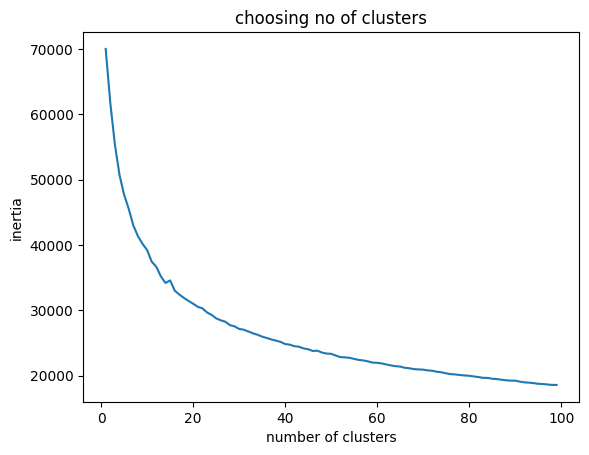

In [40]:
plt.figure()
plt.plot(range(1,max_clusters), inertias)
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.title("choosing no of clusters")
plt.show()

In [41]:
kmeans=KMeans(n_clusters=10, n_init=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10, n_init=10)

In [42]:
pca=PCA(n_components=2)
reduced_data=pd.DataFrame(pca.fit_transform(scaled_data),columns=['PC1','PC2'])

In [43]:
clusters = kmeans.predict(scaled_data)
clusters

array([7, 7, 8, ..., 0, 1, 3])

In [44]:
reduced_centers=pca.transform(kmeans.cluster_centers_)
reduced_centers

c:\Users\Raghav Tangri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[-1.04819065,  0.94195399],
       [-1.0227029 ,  0.98332639],
       [ 2.60145805,  1.12512949],
       [-0.18673396, -1.37506444],
       [ 1.91762403,  0.1018554 ],
       [-0.27581117, -1.38501335],
       [-0.90861902,  1.03710534],
       [-0.29465604, -0.06035642],
       [-0.37031724, -1.40997772],
       [ 2.67863047,  0.67016259]])

KeyError: 'cluster'

<Figure size 640x480 with 0 Axes>